## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [2]:
cdf = pd.read_csv(COUNTRIES_DATASET)
hdf = pd.read_pickle(HAPPINESS_DATASET)
cdf = cdf.rename(columns={"country_name": "country"})
cdf["country"] = cdf["country"].str.lower()
hdf["country"] = hdf["country"].str.lower()

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [3]:
country_features = pd.merge(cdf,hdf,"outer")
country_features["world_region"] = country_features["world_region"].str.lower()

## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [4]:
country_features = country_features.sort_values("happiness_score",ascending=False)
print(country_features[0:10]["country"])

38         finland
31         denmark
115    switzerland
50         iceland
92          norway
87     netherlands
114         sweden
88     new zealand
6          austria
72      luxembourg
Name: country, dtype: object


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [47]:
happiness_by_region = country_features.groupby(["world_region"]).mean()
happiness_by_region = happiness_by_region[["happiness_score"]]
happiness_by_region = happiness_by_region.sort_values("happiness_score",ascending=False)
print(happiness_by_region)

                                    happiness_score
world_region                                       
north america and anz                      7.173525
western europe                             6.967405
latin america and caribbean                5.971280
central and eastern europe                 5.891393
southeast asia                             5.517788
east asia                                  5.483633
commonwealth of independent states         5.358342
middle east and north africa               5.269306
sub-saharan africa                         4.393856
south asia                                 4.355083


The first region has only a few countries! What are them and what is their score?

In [51]:
namaa = country_features[country_features["world_region"] == "north america and anz"]
print(namaa["country"])

88       new zealand
21            canada
5          australia
127    united states
Name: country, dtype: object


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [81]:
l100 = country_features[country_features["literacy"] == "100,0"]

for index, row in l100.iterrows():
    print(str(row["world_region"]) + " - " + str(row["country"]) + " - " + str(row["happiness_score"]))
    

western europe - finland - 7.808700085
western europe - denmark - 7.645599842
western europe - norway - 7.487999916000001
western europe - luxembourg - 7.2375001910000005
north america and anz - australia - 7.222799778


What is the global average?

In [97]:
new_literacy = []
for index, row in country_features.iterrows():
    if (type(row["literacy"]) == str):
        new_literacy.append(float(row["literacy"][:-2]))
    elif (type(row["literacy"]) == float):
        new_literacy.append(row["literacy"])
    else:    
        print(type(row["literacy"]))
country_features["literacy"] = new_literacy        

In [100]:
country_features.mean()[2]

81.42857142857143

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [117]:
bl50 = country_features[country_features["literacy"] < 50]
print(round(float(bl50.shape[0])/float(country_features.shape[0]),2))

0.12


Print the raw number and the percentage of world population that is illiterate.

In [143]:
country_features["illiterates"] = country_features["population"]*(100-country_features["literacy"])*0.01
print(country_features.sum()[11])
print(str(country_features.sum()[11]/country_features.sum()[2]*100) + "%")

1281149037.99
20.847030000683425%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [144]:
country_features["population_density"] = country_features["population"]/country_features["area"]

What is the happiness score of the 3 countries with lowest population density?

In [166]:
srtpop = country_features.sort_values("population_density")
srtpop = srtpop[["country","population_density","happiness_score"]]
print(srtpop[0:3])

      country  population_density  happiness_score
83   mongolia            1.810751           5.4562
5   australia            2.636201           7.2228
14   botswana            2.731371           3.4789


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty like expectancy (y).

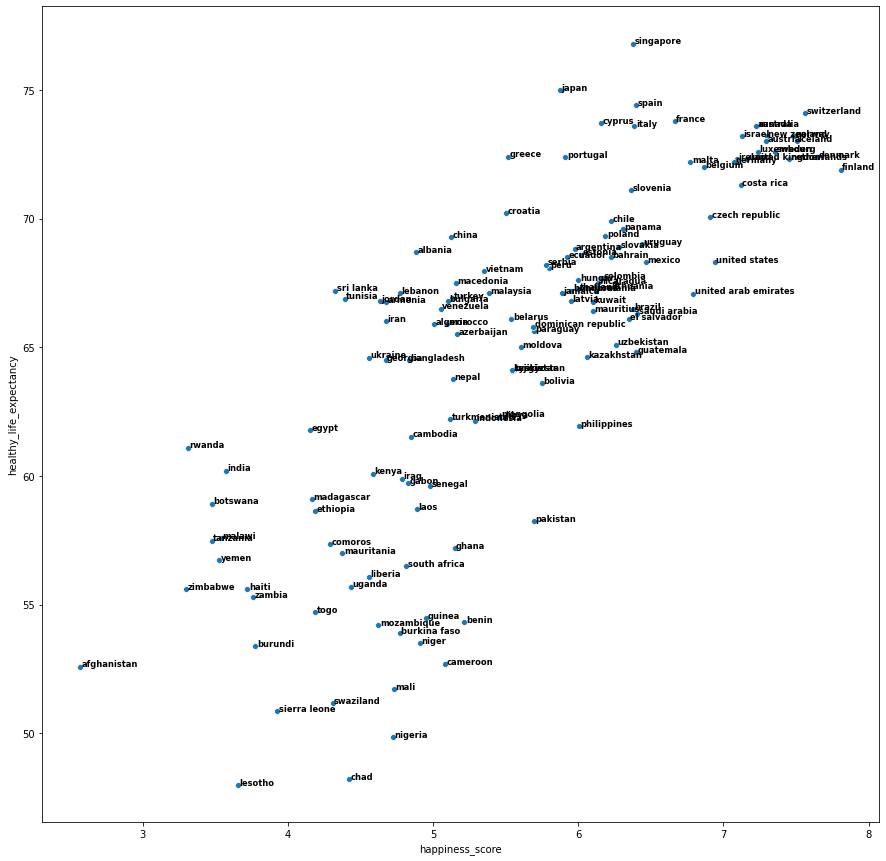

In [189]:
from matplotlib import pyplot
import seaborn as sns

fig, ax = pyplot.subplots(figsize=(15,15))
sp = sns.scatterplot(ax=ax,x=country_features["happiness_score"],y=country_features["healthy_life_expectancy"])

for line in range(0,country_features.shape[0]):
         sp.text(country_features["happiness_score"][line]+0.01, country_features["healthy_life_expectancy"][line], 
                 country_features["country"][line], horizontalalignment='left', 
                 size='small', color='black', weight='semibold')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.